In [1]:
import pandas as p
import seaborn as sb
import matplotlib.pyplot as plot
sb.set_theme(palette="deep",style="whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
#importing the dataset
data_set = p.read_csv("/Users/saishreyashwiadmala/Desktop/Data.csv")
data_set.pop('Influencer')
data_set.head()

,TV,Radio,Social Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181


In [3]:
#Data analysis before cleaning
data_set.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [4]:
#Deleting duplicate values
data_set.drop_duplicates(keep=False)

,TV,Radio,Social Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181
...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866
4568,71.0,20.610685,6.545573,249.101915
4569,44.0,19.800072,5.096192,163.631457
4570,71.0,17.534640,1.940873,253.610411


In [5]:
#Check for null values
data_set.isna().sum()

TV              10
Radio            4
Social Media     6
Sales            6
dtype: int64

In [6]:
#Replacing Null Values with Mean
data_set['TV'].fillna((data_set['TV'].mean()), inplace=True)
data_set['Radio'].fillna((data_set['TV'].mean()), inplace=True)
data_set['Social Media'].fillna((data_set['TV'].mean()), inplace=True)
data_set['Sales'].fillna((data_set['TV'].mean()), inplace=True)

In [7]:
#Check for null values
data_set.isna().sum()

TV              0
Radio           0
Social Media    0
Sales           0
dtype: int64

In [8]:
#Data Analysis after Cleaning
data_set.describe()

,TV,Radio,Social Media,Sales
count,4572.000000,4572.000000,4572.000000,4572.000000
mean,54.066857,18.191770,3.390548,192.284975
std,26.096461,9.730818,2.874864,93.206743
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.546519,1.529879,112.200878
50%,53.000000,17.875181,3.057150,188.898600
75%,77.000000,25.670989,4.812651,272.414914
max,100.000000,54.066857,54.066857,364.079751


<AxesSubplot:>

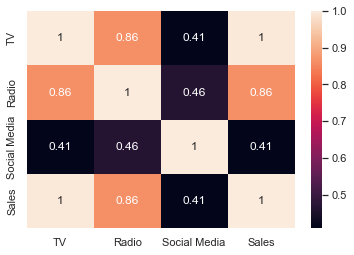

In [9]:
#Correlation Matrix after cleaning
sb.heatmap(data_set.corr(),annot=True)

<AxesSubplot:xlabel='TV'>

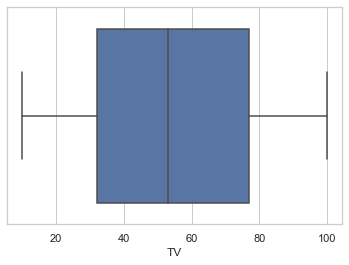

In [10]:
#Boxplot for TV
sb.boxplot(x=data_set["TV"])

<AxesSubplot:xlabel='Radio'>

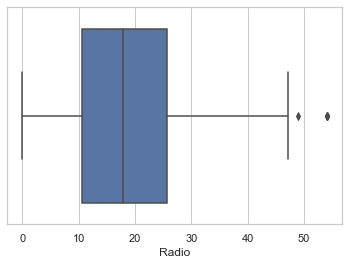

In [11]:
#Boxplot for Radio
sb.boxplot(x=data_set["Radio"])

<AxesSubplot:xlabel='Social Media'>

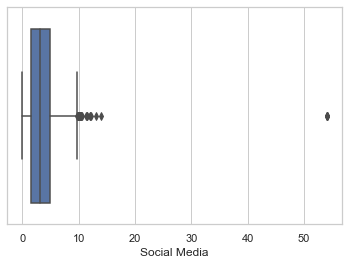

In [12]:
#Boxplot for Social Media
sb.boxplot(x=data_set["Social Media"])

<AxesSubplot:xlabel='Sales'>

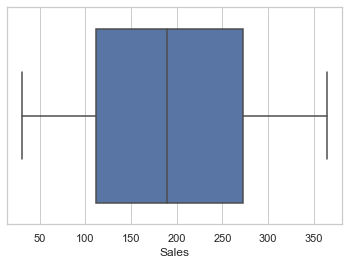

In [13]:
#Boxplot for Sales
sb.boxplot(x=data_set["Sales"])

In [14]:
#Checking for outliers using IQR rule
p25 = data_set['Radio'].quantile(0.25)
p75 = data_set['Radio'].quantile(0.75)
iqr = p75 - p25

In [15]:
#upper limit
ul = p75 + 1.5 * iqr
#lower limit
ll = p25 - 1.5 * iqr

In [16]:
new_data = data_set[data_set['Radio'] < ul]
new_data.shape

(4567, 4)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


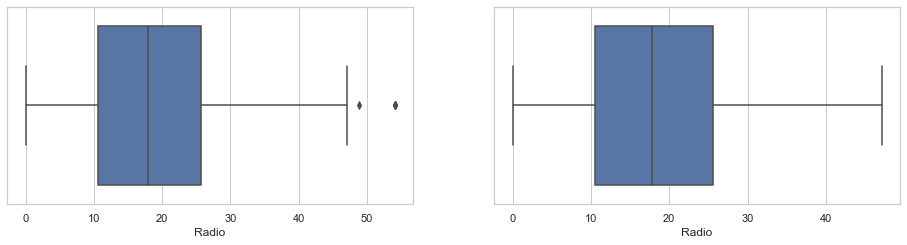

In [17]:
plot.figure(figsize=(16,8))
plot.subplot(2,2,1)
sb.boxplot(data_set['Radio'])
plot.subplot(2,2,2)
sb.boxplot(new_data['Radio'])
plot.show()

In [18]:
p25 = data_set['Social Media'].quantile(0.25)
p75 = data_set['Social Media'].quantile(0.75)
iqr = p75 - p25

In [19]:
#upper limit
ul = p75 + 1.5 * iqr
#lower limit
ll = p25 - 1.5 * iqr

In [20]:
new_data = data_set[data_set['Social Media'] < ul]
new_data.shape

(4538, 4)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


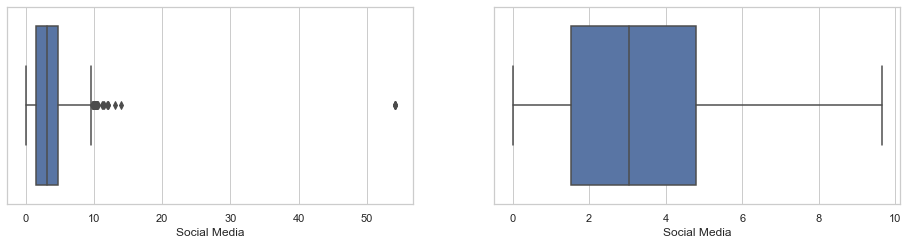

In [21]:
plot.figure(figsize=(16,8))
plot.subplot(2,2,1)
sb.boxplot(data_set['Social Media'])
plot.subplot(2,2,2)
sb.boxplot(new_data['Social Media'])
plot.show()

In [22]:
#Data Analysis after removing outliers
new_data.describe()

,TV,Radio,Social Media,Sales
count,4538.000000,4538.000000,4538.000000,4538.000000
mean,53.883797,18.099653,3.278153,191.628830
std,26.057627,9.680697,2.139481,93.066822
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.447480,1.521468,111.568542
50%,53.000000,17.790650,3.041391,188.064522
75%,76.000000,25.506645,4.779091,271.231716
max,100.000000,54.066857,9.638966,364.079751


<AxesSubplot:>

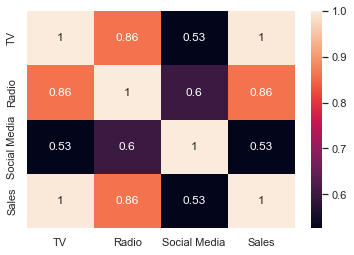

In [23]:
#Correlation Matrix after removing outliers
sb.heatmap(new_data.corr(),annot=True)

In [24]:
#independent variables (idv)
idv = data_set.iloc[:,0:-1]
print(idv)

        TV      Radio  Social Media
0     16.0   6.566231      2.907983
1     13.0   9.237765      2.409567
2     41.0  15.886446      2.913410
3     83.0  30.020028      6.922304
4     15.0   8.437408      1.405998
...    ...        ...           ...
4567  26.0   4.472360      0.717090
4568  71.0  20.610685      6.545573
4569  44.0  19.800072      5.096192
4570  71.0  17.534640      1.940873
4571  42.0  15.966688      5.046548

[4572 rows x 3 columns]


In [25]:
#dependent variables (dv)
dv = data_set.iloc[:,-1:]
print(dv)

           Sales
0      54.732757
1      46.677897
2     150.177829
3     298.246340
4      56.594181
...          ...
4567   94.685866
4568  249.101915
4569  163.631457
4570  253.610411
4571  148.202414

[4572 rows x 1 columns]


In [26]:
#splitting data for training and testing
idv_train, idv_test, dv_train, dv_test = train_test_split(idv, dv, random_state = 0)

In [27]:
#using idv_train and dv_train with fit() method to fit the line to our data
linear_regression = LinearRegression()
linear_regression.fit(idv_train, dv_train)

LinearRegression()

In [28]:
#using predict() method we are making predictions on the testing data
dv_pred = linear_regression.predict(idv_test)

In [29]:
a = p.concat([idv_test.reset_index(drop=True), p.DataFrame(dv_pred)],axis=1)
a.rename(columns = {0:'Sales'},inplace = True)
print(a)

         TV      Radio  Social Media       Sales
0      45.0  17.127520      1.462857  160.378484
1      74.0  29.520170      2.333157  264.158718
2      84.0  28.255844      5.699994  299.131664
3      83.0  34.685101     10.030244  297.072269
4      21.0   1.380311      5.286681   73.779245
...     ...        ...           ...         ...
1138   12.0   3.876011      1.906026   42.528225
1139   14.0   7.442169      1.954880   50.177312
1140   84.0  24.599184      4.602430  298.398537
1141  100.0  33.151808      5.473668  355.992727
1142   19.0   8.726783      0.497838   67.814781

[1143 rows x 4 columns]


In [30]:
r2_score(dv_test, dv_pred)

0.9855204934919292

In [31]:
print(linear_regression.intercept_)

[-0.28496431]


In [32]:
print(linear_regression.coef_)

[[3.49912144 0.18164547 0.06278639]]
